In [1]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

%matplotlib inline

In [2]:
def revert_channel(image):
    return image[:,:,::-1]

def convert_xy_to_xyx2y2(x,y,w,h):
    x1 = x - w//2
    y1 = y - h//2
    x2 = x1 + w
    y2 = y1 + h
    
    return x1, y1, x2, y2
    

In [3]:
class COLOR_TYPES(Enum):
    Black = 0
    White = 1
    Gray = 2
    Red = 3
    Orange = 4
    Yellow = 5
    Yellow_Green = 6
    Green = 7
    Green_Cyan = 8
    Cyan = 9
    Cyan_Blue = 10
    Blue = 11
    Violet = 12
    Magenta = 13
    Pink = 14
    
def get_pixel_color_type(h, s, v):

    if v < 75:
        return COLOR_TYPES.Black
    if v > 190 and s < 27:
        return COLOR_TYPES.White
    if s < 53 and v < 185:
        return COLOR_TYPES.Gray
    
    if h < 10:
        return COLOR_TYPES.Red
    if h < 20:
        return COLOR_TYPES.Orange
    if h < 30:
        return COLOR_TYPES.Yellow
    if h < 40:
        return COLOR_TYPES.Yellow_Green
    if h < 70:
        return COLOR_TYPES.Green
    if h < 85:
        return COLOR_TYPES.Green_Cyan
    if h < 90:
        return COLOR_TYPES.Cyan
    if h < 100:
        return COLOR_TYPES.Cyan_Blue
    if h < 125:
        return COLOR_TYPES.Blue
    if h < 140:
        return COLOR_TYPES.Violet
    if h < 155:
        return COLOR_TYPES.Magenta
    if h < 170:
        return COLOR_TYPES.Pink
    
    return COLOR_TYPES.Red

In [4]:
def calc_color_in_rect(rect, image):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    xmin, ymin, xmax, ymax = rect
#     plt.imshow(hsv)
    colors_count = [0] * len(COLOR_TYPES)
    crop_image = image[ymin: ymax, xmin: xmax]
#     plt.imshow(revert_channel(crop_image))
    h = s = v = 0
    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            h = hsv[i, j, 0]
            s = hsv[i, j, 1]
            v = hsv[i, j, 2]
            if i == ymax//2 and j == xmax//2:
                print(h,s,v)
                
            color_type = get_pixel_color_type(h, s, v)
            colors_count[color_type.value] += 1
    
    max_idx = np.argmax(np.asarray(colors_count))
    return COLOR_TYPES(max_idx)
    

## Load image and select area

(533, 160, 3)
Color of jacket:  Red
Color of pants:  Blue


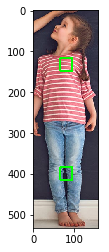

In [6]:
i_path = 'images/2.png'
img = cv2.imread(i_path)
print(img.shape)
img_height, img_width = img.shape[:2]
center_x_jacket = img_width // 2
center_y_jacket = img_height // 4

center_x_pants = img_width // 2
center_y_pants = img_height // 2 + center_y_jacket

x1_j, y1_j, x2_j, y2_j = convert_xy_to_xyx2y2(center_x_jacket, center_y_jacket, 30, 30)
x1_p, y1_p, x2_p, y2_p = convert_xy_to_xyx2y2(center_x_pants, center_y_pants, 30, 30)


image_copied = img.copy()
cv2.rectangle(image_copied,(x1_j, y1_j), (x2_j, y2_j),(0,255,0),3)
cv2.rectangle(image_copied,(x1_p, y1_p), (x2_p, y2_p),(0,255,0),3)
plt.imshow(revert_channel(image_copied))
print('Color of jacket: ', calc_color_in_rect((x1_j, y1_j, x2_j, y2_j), img).name)
print('Color of pants: ', calc_color_in_rect((x1_p, y1_p, x2_p, y2_p), img).name)